In [7]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [6]:
cd /Users/christopherbaker_1/desktop

/Users/christopherbaker_1/Desktop


In [8]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import requests 
import time 
from scipy.stats import linregress


# import openweathermap api_key
from api_key import weather_api_key


# import citipy to determine the cities based on latitude & longitude 
from citipy import citipy

## Generate cities list by using "citipy" library 

In [9]:
# Empty list for holding latitude and longitude combinations
lat_lngs = []

# Empty list for holding cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random latitude and longitude combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each latitude, longitude combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 598


## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

In [10]:
# set api base url 
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key

# defining units
units = "metric"

# define empty list to fetch weather data for each city 
city_data = []

# print 
print("Begining Data Retrieval")
print("-----------------------")

# create counters
record_cnt = 1 
set_cnt = 1

# loop through all cities in list to fetch weather data 
for i, city in enumerate(cities):
    
    # group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_cnt =+1
        record_cnt = 0 
        
    # create endpoint url for each city 
    city_url = url + "&q=" + city 
    
    # log url, record and set numbers 
    print("Processing Record %s of set %s | %s" % (record_cnt, set_cnt,city))
    
    # add 1 to the record count 
    record_cnt +=1
    
    # run api request for every city 
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Begining Data Retrieval
-----------------------
Processing Record 1 of set 1 | iqaluit
Processing Record 2 of set 1 | tolanaro
Processing Record 3 of set 1 | kupang
Processing Record 4 of set 1 | ginir
Processing Record 5 of set 1 | whitehorse
Processing Record 6 of set 1 | aasiaat
Processing Record 7 of set 1 | port mathurin
Processing Record 8 of set 1 | adamstown
Processing Record 9 of set 1 | port elizabeth
Processing Record 10 of set 1 | waitangi
Processing Record 11 of set 1 | lauro de freitas
Processing Record 12 of set 1 | grytviken
Processing Record 13 of set 1 | byron bay
Processing Record 14 of set 1 | talnakh
Processing Record 15 of set 1 | 'ain el hadjar
Processing Record 16 of set 1 | alpena
Processing Record 17 of set 1 | yellowknife
Processing Record 18 of set 1 | edinburgh of the seven seas
Processing Record 19 of set 1 | hawaiian paradise park
Processing Record 20 of set 1 | richards bay
Processing Record 21 of set 1 | estancia
Processing Record 22 of set 1 | bredasdo

Processing Record 38 of set 1 | hamilton
Processing Record 39 of set 1 | namibe
Processing Record 40 of set 1 | mildura
Processing Record 41 of set 1 | hirara
Processing Record 42 of set 1 | cota
Processing Record 43 of set 1 | hami
Processing Record 44 of set 1 | qamdo
Processing Record 45 of set 1 | aripuana
Processing Record 46 of set 1 | san jose village
City not found. Skipping...
Processing Record 47 of set 1 | sabang
Processing Record 48 of set 1 | vorgashor
Processing Record 49 of set 1 | piti village
Processing Record 0 of set 1 | vallenar
Processing Record 1 of set 1 | solleftea
Processing Record 2 of set 1 | kota bharu
Processing Record 3 of set 1 | al bawiti
Processing Record 4 of set 1 | alice springs
Processing Record 5 of set 1 | bubaque
Processing Record 6 of set 1 | sainyabuli
Processing Record 7 of set 1 | rawson
Processing Record 8 of set 1 | hasaki
Processing Record 9 of set 1 | flin flon
Processing Record 10 of set 1 | codrington
Processing Record 11 of set 1 | ana

Processing Record 32 of set 1 | taroa
Processing Record 33 of set 1 | aykhal
Processing Record 34 of set 1 | luderitz
Processing Record 35 of set 1 | temnikov
Processing Record 36 of set 1 | san juan
Processing Record 37 of set 1 | roma
Processing Record 38 of set 1 | tacuarembo
Processing Record 39 of set 1 | dabhoi
Processing Record 40 of set 1 | jwaneng
Processing Record 41 of set 1 | ambam
Processing Record 42 of set 1 | nueva gerona
Processing Record 43 of set 1 | santana
Processing Record 44 of set 1 | nyurba
Processing Record 45 of set 1 | murud
Processing Record 46 of set 1 | alofi
Processing Record 47 of set 1 | mirnyy
Processing Record 48 of set 1 | northam
Processing Record 49 of set 1 | whangarei
Processing Record 0 of set 1 | karlskrona
Processing Record 1 of set 1 | nagqu
Processing Record 2 of set 1 | soio
Processing Record 3 of set 1 | antofagasta
Processing Record 4 of set 1 | tuburan
Processing Record 5 of set 1 | ongjin
Processing Record 6 of set 1 | fenghuang
Proces

Processing Record 23 of set 1 | zhanga buqtyrma
Processing Record 24 of set 1 | magong
Processing Record 25 of set 1 | berrotaran
Processing Record 26 of set 1 | belmonte
Processing Record 27 of set 1 | kisangani
Processing Record 28 of set 1 | alaghsas
Processing Record 29 of set 1 | polyarnyy
Processing Record 30 of set 1 | iskushuban
Processing Record 31 of set 1 | nikel
Processing Record 32 of set 1 | sao felix do xingu
Processing Record 33 of set 1 | sal rei
Processing Record 34 of set 1 | adrar
Processing Record 35 of set 1 | isla aguada
Processing Record 36 of set 1 | bagli
Processing Record 37 of set 1 | dolisie
Processing Record 38 of set 1 | demre
Processing Record 39 of set 1 | leua
Processing Record 40 of set 1 | formosa
Processing Record 41 of set 1 | faya-largeau
Processing Record 42 of set 1 | emerald
Processing Record 43 of set 1 | la palma
Processing Record 44 of set 1 | baharly
Processing Record 45 of set 1 | polonoling
Processing Record 46 of set 1 | jiwani
Processin

In [16]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          572
Lat           572
Lng           572
Max Temp      572
Humidity      572
Cloudiness    572
Wind Speed    572
Country       572
Date          572
dtype: int64

In [12]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,iqaluit,63.7506,-68.5145,4.85,80,100,3.60,CA,1693951353
1,tolanaro,-25.0319,46.9987,22.04,78,0,8.23,MG,1693951518
2,kupang,-10.1667,123.5833,23.32,83,20,3.09,ID,1693951518
3,ginir,7.1333,40.7000,19.57,53,97,2.16,ET,1693951518
4,whitehorse,60.7161,-135.0538,15.43,49,40,1.03,CA,1693951518


In [15]:
# Export the City_Data into a csv
# city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [14]:
# Read saved data
#city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,iqaluit,63.7506,-68.5145,4.85,80,100,3.60,CA,1693951353
1,tolanaro,-25.0319,46.9987,22.04,78,0,8.23,MG,1693951518
2,kupang,-10.1667,123.5833,23.32,83,20,3.09,ID,1693951518
3,ginir,7.1333,40.7000,19.57,53,97,2.16,ET,1693951518
4,whitehorse,60.7161,-135.0538,15.43,49,40,1.03,CA,1693951518


# Create the Scatter Plots Requested

### Latitude Vs. Temperature

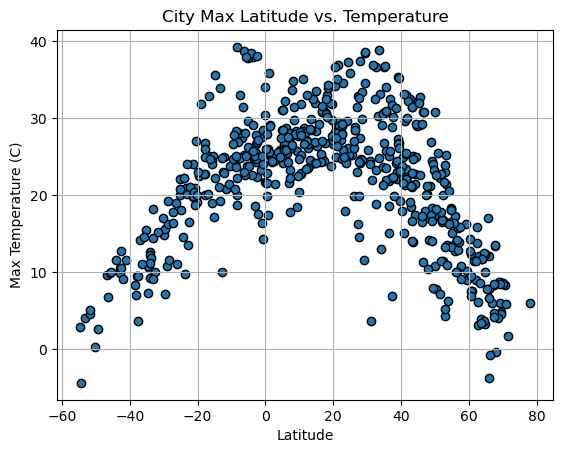

In [28]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolor="black")
plt.title("City Max Latitude vs. Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid()


# Save the figure
#plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

### Latitude Vs. Humidity

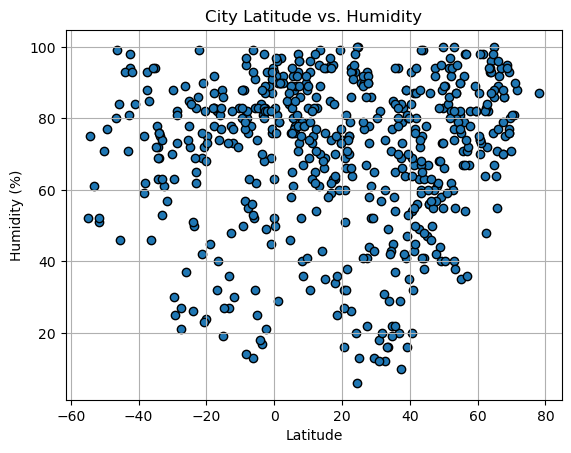

In [29]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolor="black")
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

# Save the figure
#plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

### Latitude Vs. Cloudiness

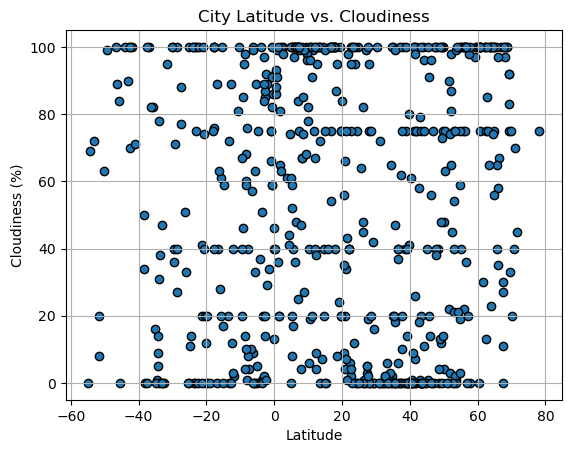

In [30]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolor="black")
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

# Save the figure
#plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

### Latitude vs. Wind Speed Plot

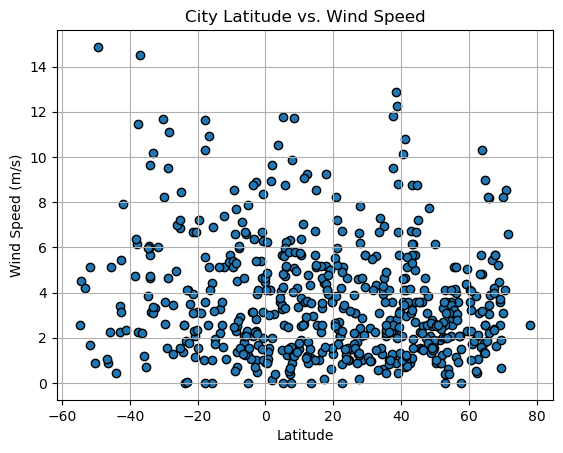

In [31]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolor="black")
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid()

# Save the figure
#plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

# Requirement 2: Compute Linear Regression for Each Relationship

In [37]:
# Define a function to create Linear Regression plots
def linear_regression(x_val, y_val, x = 0, y = 0):
    slope, intercept, rval, pval, stderr = linregress(x_val, y_val)
    regress_val = x_val * slope + intercept
    line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
    plt.scatter(x_val, y_val)
    plt.plot(x_val, regress_val, "r-")
    plt.annotate(line_eq, xy = (x, y), xycoords = "axes fraction", fontsize = 14, color = "red")
    plt.xlabel("Latitude")
    plt.ylabel(y_val.name)
    print(f"The r-value is: {rval**2}")
    plt.show()

In [27]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,iqaluit,63.7506,-68.5145,4.85,80,100,3.60,CA,1693951353
3,ginir,7.1333,40.7000,19.57,53,97,2.16,ET,1693951518
4,whitehorse,60.7161,-135.0538,15.43,49,40,1.03,CA,1693951518
5,aasiaat,68.7098,-52.8699,3.80,95,100,5.04,GL,1693951518
13,talnakh,69.4865,88.3972,2.34,81,30,0.25,RU,1693951519


In [28]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,tolanaro,-25.0319,46.9987,22.04,78,0,8.23,MG,1693951518
2,kupang,-10.1667,123.5833,23.32,83,20,3.09,ID,1693951518
6,port mathurin,-19.6833,63.4167,22.54,75,12,7.51,MU,1693951518
7,adamstown,-25.0660,-130.1015,19.90,85,100,7.39,PN,1693951518
8,port elizabeth,-33.9180,25.5701,12.16,71,0,8.75,ZA,1693951518


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.4897240072573488


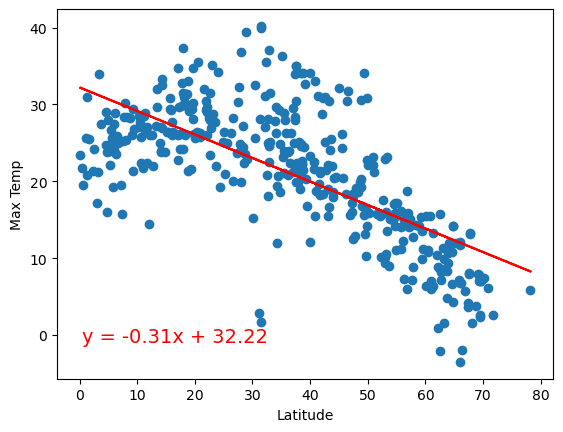

In [38]:
# Linear regression on Northern Hemisphere
x_val = northern_hemi_df["Lat"]
y_val = northern_hemi_df["Max Temp"]
linear_regression(x_val, y_val, .05, .1)

The r-value is: 0.6964289165654592


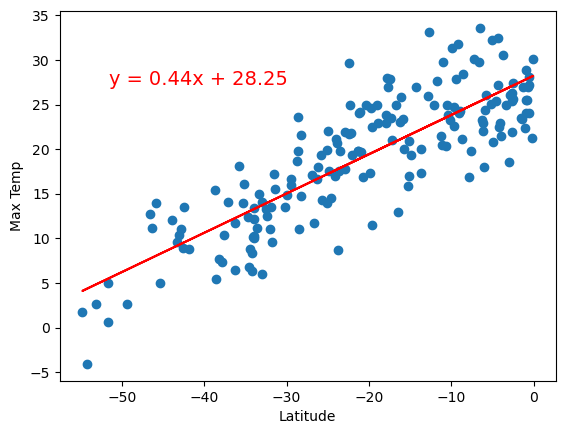

In [39]:
# Linear regression on Southern Hemisphere
x_val = southern_hemi_df["Lat"]
y_val = southern_hemi_df["Max Temp"]
linear_regression(x_val, y_val, .1, .8)

### Discussion about linear relationship:
#### Northern Hemisphere: Max Temp and Latitude in the Northern Hemisphere displays a negative correlation. The r-value(0.4897) indicates a positive linear relationship but has a weaker linear relationship than the Southern Hemisphere. 

#### Southern Hemisphere: Max Temp and Latitude in the Southern Hemisphere displays a positive correlation. The r-value(0.6964) indicates a positive linear relationship and has a stronger linear relationship than the Northern Hemisphere. 

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 5.155833714259054e-05


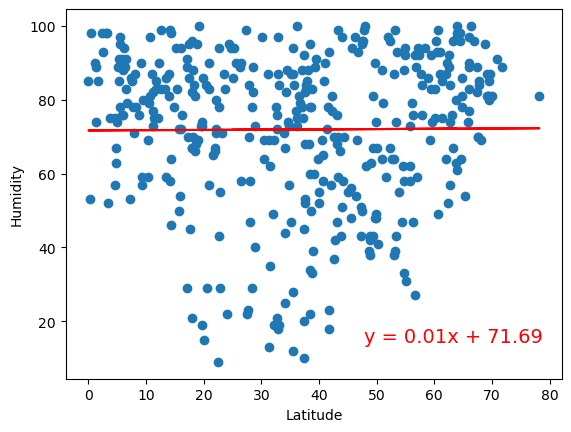

In [43]:
# Northern Hemisphere
x_val = northern_hemi_df["Lat"]
y_val = northern_hemi_df["Humidity"]
linear_regression(x_val, y_val, .6, .1)

The r-value is: 0.005873246384695303


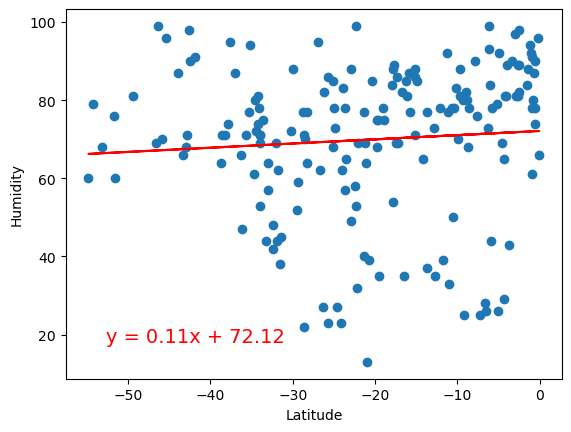

In [45]:
# Southern Hemisphere
x_val = southern_hemi_df["Lat"]
y_val = southern_hemi_df["Humidity"]
linear_regression(x_val, y_val, .08, .1)

In [36]:
### Discussion about linear relationship:

#### Northern Hemisphere: Humidity and Latitude in the Northern Hemisphere displays no correlation. The r-value(0.00005) indicates a very weak linear relationship and has a weaker linear relationship than the Southern Hemisphere. 

#### Southern Hemisphere: Humidity and Latitude in the Southern Hemisphere displays no correlation. The r-value(0.00587) indicates a very weak linear relationship and has a stronger linear relationship than the Northern Hemisphere. 
